### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.tree import DecisionTreeRegressor

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)


pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_daily_metrics_agg.csv")

In [3]:
df

,device_id,avg_resting_heartrate,avg_active_heartrate,bmi,avg_vo2,avg_workout_minutes,steps
0,fce425f2-e48a-11ea-8204-0242ac110002,73.846705,141.766552,25.972346,30.314502,35.606041,7007.131507
1,fd2073e0-e48a-11ea-8204-0242ac110002,66.651361,147.190220,28.657224,26.331489,4.933199,5222.191781
2,d5b6536a-e48a-11ea-8204-0242ac110002,61.535264,115.354649,28.069176,30.505854,26.808979,11651.545205
3,d62d31e2-e48a-11ea-8204-0242ac110002,60.127616,109.560125,24.272347,33.009460,30.203698,12232.284932
4,d72e7fc4-e48a-11ea-8204-0242ac110002,57.679282,107.348045,26.136668,33.622192,41.929783,10685.441096
...,...,...,...,...,...,...,...
2995,e3c983d2-e48a-11ea-8204-0242ac110002,54.834547,108.917041,11.445842,29.639250,53.214874,16407.613699
2996,e4c361fe-e48a-11ea-8204-0242ac110002,54.004800,104.653493,13.264969,31.383905,48.175439,15718.427397
2997,f2823310-e48a-11ea-8204-0242ac110002,71.083376,129.590143,26.773275,27.358607,36.169260,7068.331507
2998,f81b5036-e48a-11ea-8204-0242ac110002,60.806808,119.727056,32.224012,32.356940,32.854305,7054.189041


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_id              3000 non-null   object 
 1   avg_resting_heartrate  3000 non-null   float64
 2   avg_active_heartrate   3000 non-null   float64
 3   bmi                    3000 non-null   float64
 4   avg_vo2                3000 non-null   float64
 5   avg_workout_minutes    3000 non-null   float64
 6   steps                  3000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 164.2+ KB


In [5]:
df.describe(include='all')

,device_id,avg_resting_heartrate,avg_active_heartrate,bmi,avg_vo2,avg_workout_minutes,steps
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,3000,NaN,NaN,NaN,NaN,NaN,NaN
top,edc95d12-e48a-11ea-8204-0242ac110002,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,62.266620,119.975708,22.902468,32.351569,35.573140,10211.991552
std,NaN,12.521525,16.910238,4.492680,7.029757,12.472619,2985.154675
min,NaN,45.046490,82.041834,7.592313,10.934276,4.219295,5047.646575
25%,NaN,52.024483,106.580546,19.761279,27.334516,32.626821,7181.889726
50%,NaN,58.526237,117.846432,22.912607,33.212109,36.840635,10839.997260
75%,NaN,70.799247,131.758270,26.005915,37.412472,41.755371,12759.914384


In [6]:
df.shape

(3000, 7)

In [7]:
df.columns

Index(['device_id', 'avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'avg_vo2', 'avg_workout_minutes', 'steps'], dtype='object')

In [8]:
df["device_id"].nunique()

3000

### Data Visualization

### Univariate Data Exploration

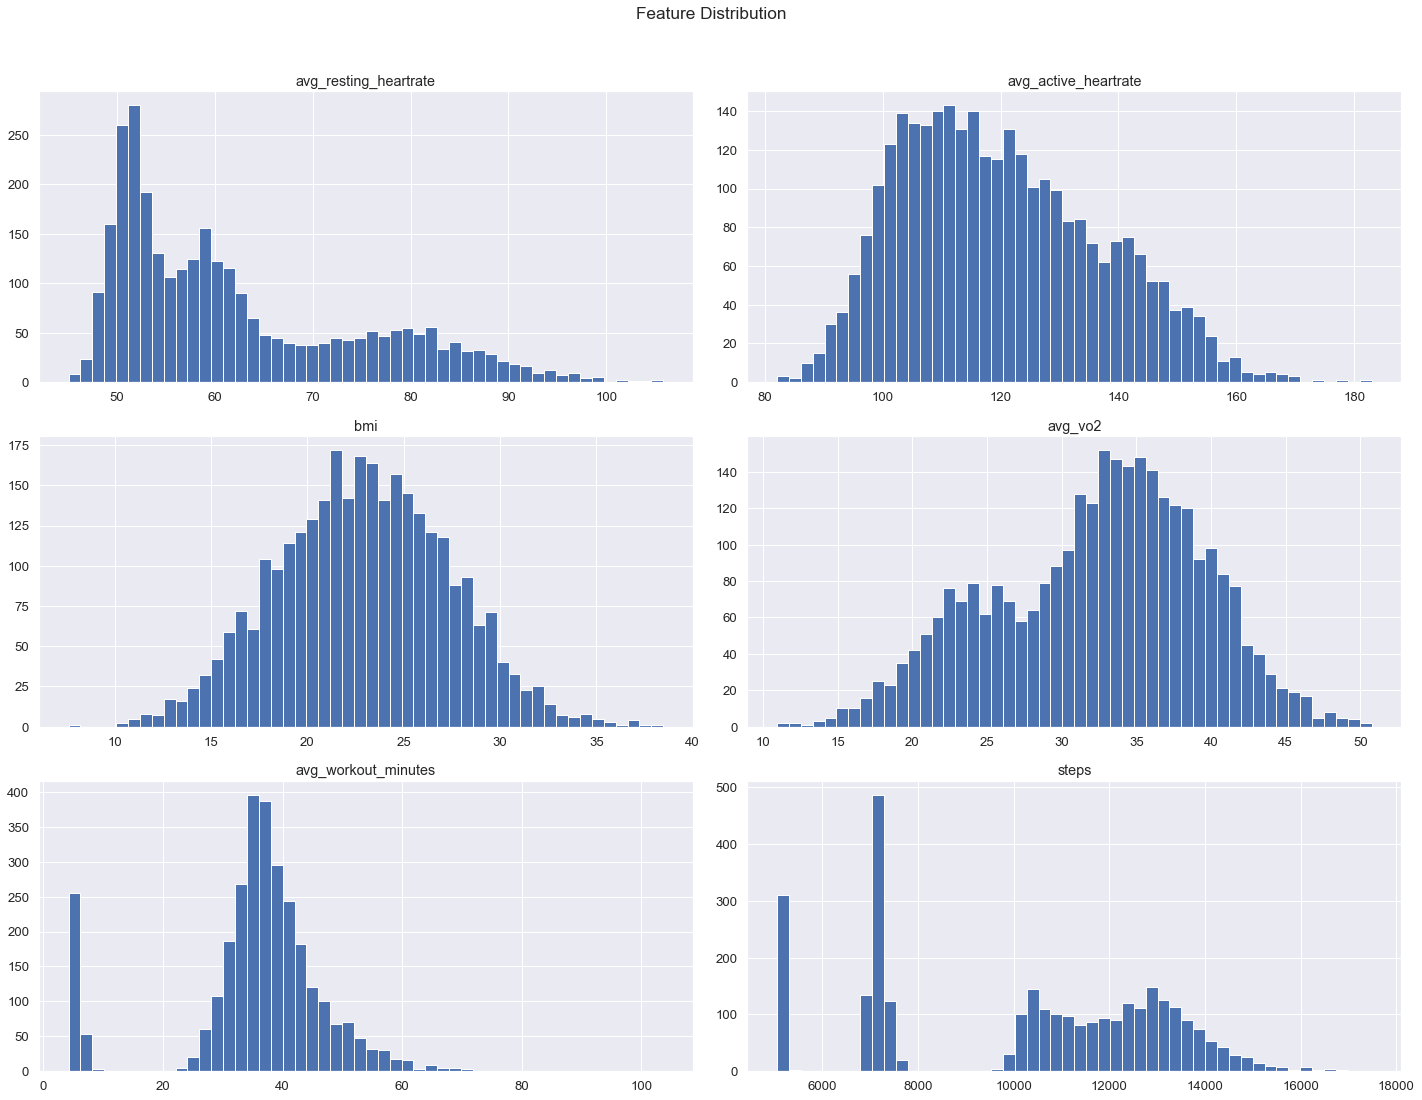

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

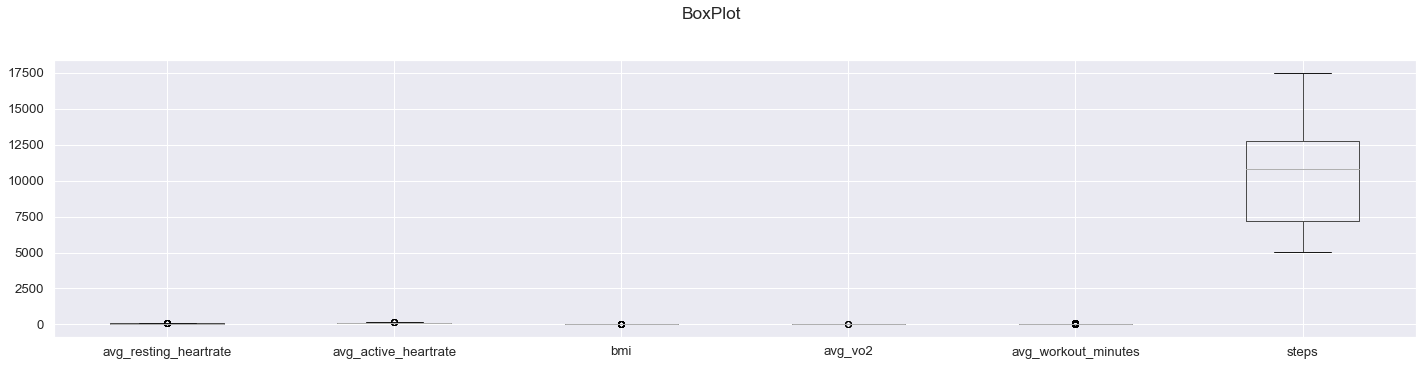

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Correlation

In [11]:
df.corr()

,avg_resting_heartrate,avg_active_heartrate,bmi,avg_vo2,avg_workout_minutes,steps
avg_resting_heartrate,1.000000,0.806261,0.143967,-0.941182,-0.374457,-0.789815
avg_active_heartrate,0.806261,1.000000,0.328879,-0.789361,-0.393310,-0.817233
bmi,0.143967,0.328879,1.000000,-0.127956,-0.377415,-0.453897
avg_vo2,-0.941182,-0.789361,-0.127956,1.000000,0.306123,0.731383
avg_workout_minutes,-0.374457,-0.393310,-0.377415,0.306123,1.000000,0.472424
steps,-0.789815,-0.817233,-0.453897,0.731383,0.472424,1.000000


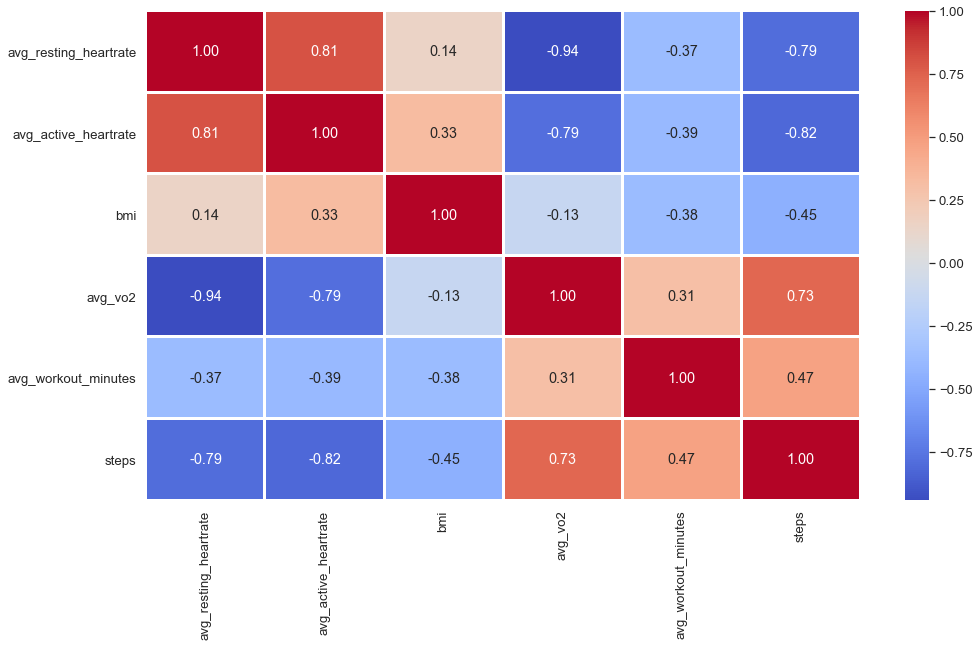

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Pairplots

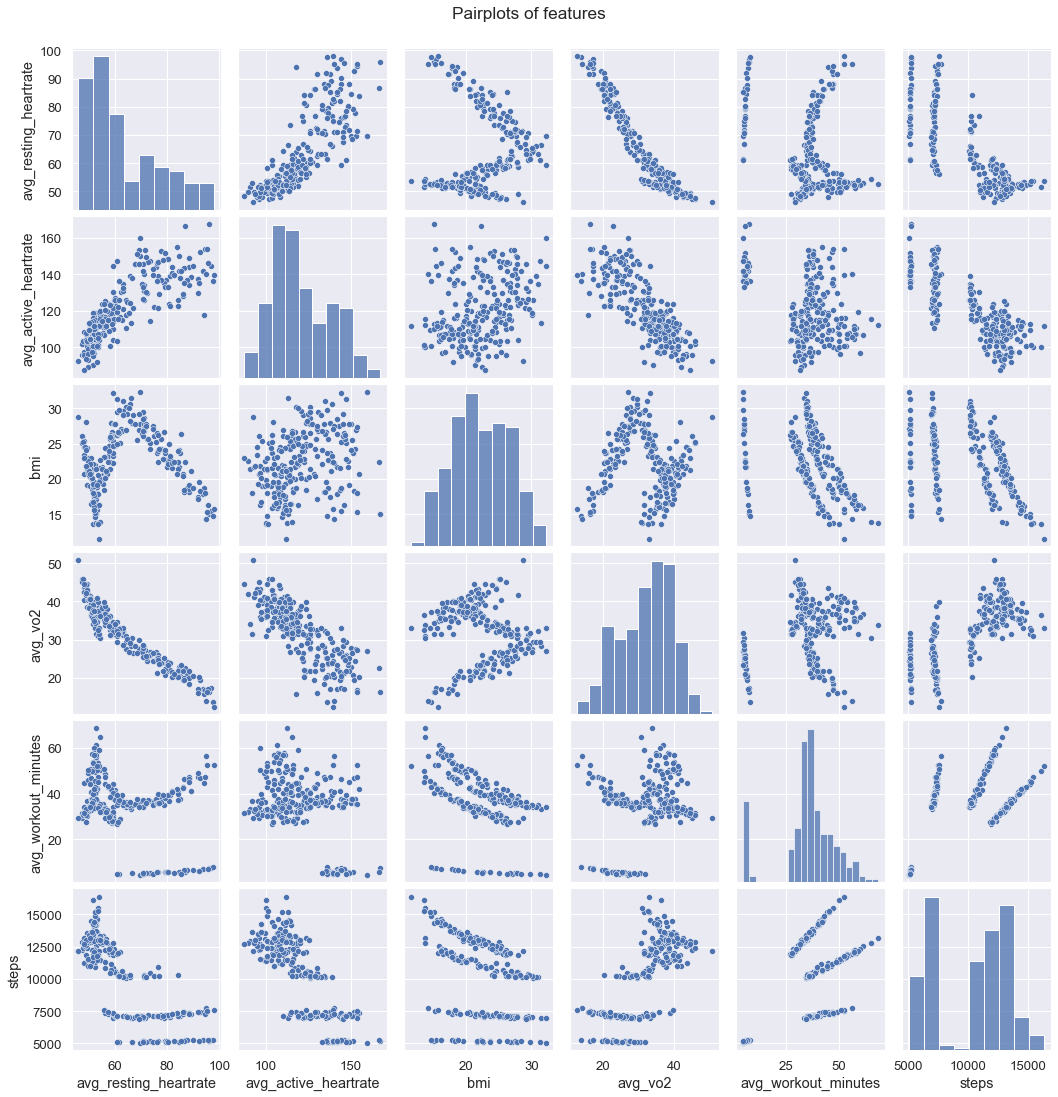

In [13]:
sns.pairplot(df.sample(250))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

### Drop unwanted features

In [14]:
df.columns

Index(['device_id', 'avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'avg_vo2', 'avg_workout_minutes', 'steps'], dtype='object')

In [15]:
df.drop(['device_id'],axis=1,inplace=True)

In [16]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,bmi,avg_vo2,avg_workout_minutes,steps
0,73.846705,141.766552,25.972346,30.314502,35.606041,7007.131507
1,66.651361,147.190220,28.657224,26.331489,4.933199,5222.191781
2,61.535264,115.354649,28.069176,30.505854,26.808979,11651.545205
3,60.127616,109.560125,24.272347,33.009460,30.203698,12232.284932
4,57.679282,107.348045,26.136668,33.622192,41.929783,10685.441096


### Treat Missing Values

In [17]:
df.isnull().sum()

avg_resting_heartrate    0
avg_active_heartrate     0
bmi                      0
avg_vo2                  0
avg_workout_minutes      0
steps                    0
dtype: int64

### Replacing values

In [18]:
df.columns

Index(['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'avg_vo2', 'avg_workout_minutes', 'steps'], dtype='object')

In [19]:
df = df[['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'avg_vo2','steps','avg_workout_minutes']]

In [20]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,bmi,avg_vo2,steps,avg_workout_minutes
0,73.846705,141.766552,25.972346,30.314502,7007.131507,35.606041
1,66.651361,147.190220,28.657224,26.331489,5222.191781,4.933199
2,61.535264,115.354649,28.069176,30.505854,11651.545205,26.808979
3,60.127616,109.560125,24.272347,33.009460,12232.284932,30.203698
4,57.679282,107.348045,26.136668,33.622192,10685.441096,41.929783


### Treat Duplicate Values

In [21]:
df.duplicated(keep='first').sum()

0

### Train Test Split

In [22]:
df.shape

(3000, 6)

In [23]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [24]:
X.values, y.values

(array([[   73.84670493,   141.76655188,    25.97234553,    30.31450199,
          7007.13150685],
        [   66.65136141,   147.19021976,    28.65722392,    26.33148911,
          5222.19178082],
        [   61.53526422,   115.35464938,    28.06917617,    30.50585357,
         11651.54520548],
        ...,
        [   71.08337577,   129.59014328,    26.77327498,    27.35860683,
          7068.33150685],
        [   60.80680754,   119.72705648,    32.22401206,    32.35694034,
          7054.1890411 ],
        [   73.70624713,   119.67877667,    25.1468829 ,    26.78086361,
          7194.55616438]]),
 array([35.60604083,  4.93319851, 26.80897921, ..., 36.16925973,
        32.85430521, 37.83751942]))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=0)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2250, 5), (750, 5), (2250,), (750,))

### Feature Scaling

In [27]:
X_train

array([[   86.50626974,   145.19859615,    19.37562281,    19.27990315,
         7273.45753425],
       [   58.4553145 ,   116.60329586,    22.45777086,    35.54735419,
        10711.35068493],
       [   52.26592926,   102.85307633,    17.85031217,    34.73749802,
        11753.37260274],
       ...,
       [   55.4199429 ,   103.22569528,    12.55226271,    29.24657278,
        16025.49589041],
       [   73.74451901,   133.93387057,    24.5092666 ,    24.69337154,
         7173.60547945],
       [   49.57553895,   103.07375259,    25.01671765,    43.82967568,
        10745.14520548]])

In [30]:
minmax = MinMaxScaler()

In [32]:
X_train_scaled = minmax.fit_transform(X_train)

In [33]:
X_test_scaled = minmax.transform(X_test)

In [34]:
X_train_scaled

array([[0.6823126 , 0.62582632, 0.3815435 , 0.21439133, 0.18991287],
       [0.22067194, 0.34247279, 0.48134344, 0.6322869 , 0.48353516],
       [0.11881189, 0.20622056, 0.33215395, 0.61148246, 0.57253178],
       ...,
       [0.17071817, 0.20991288, 0.16060314, 0.47042573, 0.9374037 ],
       [0.4722897 , 0.51420309, 0.54777085, 0.35345826, 0.18138474],
       [0.07453555, 0.20840727, 0.56420212, 0.84505198, 0.48642147]])

In [35]:
X_test_scaled

array([[0.80039278, 0.59368664, 0.3328542 , 0.15679145, 0.01564153],
       [0.0376132 , 0.19271303, 0.56398697, 0.89650615, 0.66693225],
       [0.43064842, 0.4831294 , 0.61931746, 0.43056021, 0.44679491],
       ...,
       [0.63720371, 0.49701404, 0.45997461, 0.28807131, 0.18637863],
       [0.06062083, 0.06064086, 0.55449354, 0.80572039, 0.63615672],
       [0.41750991, 0.47216174, 0.62228206, 0.52058917, 0.00468291]])

### Model Training 1

In [36]:
dt = DecisionTreeRegressor()

In [37]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:
dtpred = dt.predict(X_test)

In [39]:
dtpred[:10]

array([ 6.7546704 , 31.43667584, 36.85928525,  4.59073313, 36.4434394 ,
       32.79874833, 48.17543898, 50.66111903, 32.96798116,  7.37806484])

In [40]:
r2_score(y_test, dtpred)

0.9932104920840221

In [41]:
dt.score(X_train, y_train)

1.0

### Model Training 2

In [42]:
df.columns

Index(['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'avg_vo2', 'steps', 'avg_workout_minutes'], dtype='object')

In [43]:
df2 = df[['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'steps','avg_workout_minutes', 'avg_vo2']]

In [44]:
df2.head()

,avg_resting_heartrate,avg_active_heartrate,bmi,steps,avg_workout_minutes,avg_vo2
0,73.846705,141.766552,25.972346,7007.131507,35.606041,30.314502
1,66.651361,147.190220,28.657224,5222.191781,4.933199,26.331489
2,61.535264,115.354649,28.069176,11651.545205,26.808979,30.505854
3,60.127616,109.560125,24.272347,12232.284932,30.203698,33.009460
4,57.679282,107.348045,26.136668,10685.441096,41.929783,33.622192


In [45]:
X = df2.iloc[:,0:5]
y = df2.iloc[:,5]

In [46]:
X.values, y.values

(array([[   73.84670493,   141.76655188,    25.97234553,  7007.13150685,
            35.60604083],
        [   66.65136141,   147.19021976,    28.65722392,  5222.19178082,
             4.93319851],
        [   61.53526422,   115.35464938,    28.06917617, 11651.54520548,
            26.80897921],
        ...,
        [   71.08337577,   129.59014328,    26.77327498,  7068.33150685,
            36.16925973],
        [   60.80680754,   119.72705648,    32.22401206,  7054.1890411 ,
            32.85430521],
        [   73.70624713,   119.67877667,    25.1468829 ,  7194.55616438,
            37.83751942]]),
 array([30.31450199, 26.33148911, 30.50585357, ..., 27.35860683,
        32.35694034, 26.78086361]))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=0)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2250, 5), (750, 5), (2250,), (750,))

In [49]:
dt2 = DecisionTreeRegressor()

In [50]:
dt2.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
dt2pred = dt2.predict(X_test)

In [52]:
dt2pred[:10]

array([16.36507292, 46.42354863, 26.88447501, 24.24837265, 42.63534958,
       32.94321754, 36.61559112, 36.74369879, 39.18028785, 17.03683774])

In [53]:
r2_score(y_test, dt2pred)

0.9037268472528412

In [54]:
dt2.score(X_train, y_train)

1.0

### Parameter Tuning for Max_Depth 3, 5 and 9

In [55]:
dt_max3 = DecisionTreeRegressor(max_depth=3, random_state=0)

In [56]:
dt_max3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [57]:
dt_max3pred = dt_max3.predict(X_test)

In [58]:
dt_max3pred[:10]

array([17.83997834, 43.55270304, 25.65302335, 29.14904594, 43.55270304,
       29.14904594, 35.6624403 , 35.6624403 , 35.6624403 , 17.83997834])

In [59]:
r2_score(y_test, dt_max3pred)

0.9158855481213637

In [60]:
dt_max3.score(X_train, y_train)

0.9123686988753844

In [61]:
dt_max5 = DecisionTreeRegressor(max_depth=5, random_state=0)

In [62]:
dt_max5.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [63]:
dt_max5pred = dt_max5.predict(X_test)

In [64]:
dt_max5pred[:10]

array([17.51566403, 44.31991962, 27.1036393 , 26.74460013, 42.10781897,
       29.38478869, 33.44995999, 36.45061053, 36.45061053, 16.18282801])

In [65]:
r2_score(y_test, dt_max5pred)

0.9413914681108478

In [66]:
dt_max5.score(X_train, y_train)

0.9456853478888674

In [67]:
dt_max9 = DecisionTreeRegressor(max_depth=9, random_state=0)

In [68]:
dt_max9.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=0)

In [69]:
dt_max9pred = dt_max9.predict(X_test)

In [70]:
dt_max9pred[:10]

array([15.62697326, 46.14313591, 26.79268557, 26.99012766, 40.55244841,
       33.01494688, 33.30402181, 37.15746584, 37.15746584, 18.73167544])

In [71]:
r2_score(y_test, dt_max9pred)

0.9309705217497614

In [72]:
dt_max9.score(X_train, y_train)

0.9733386727820976

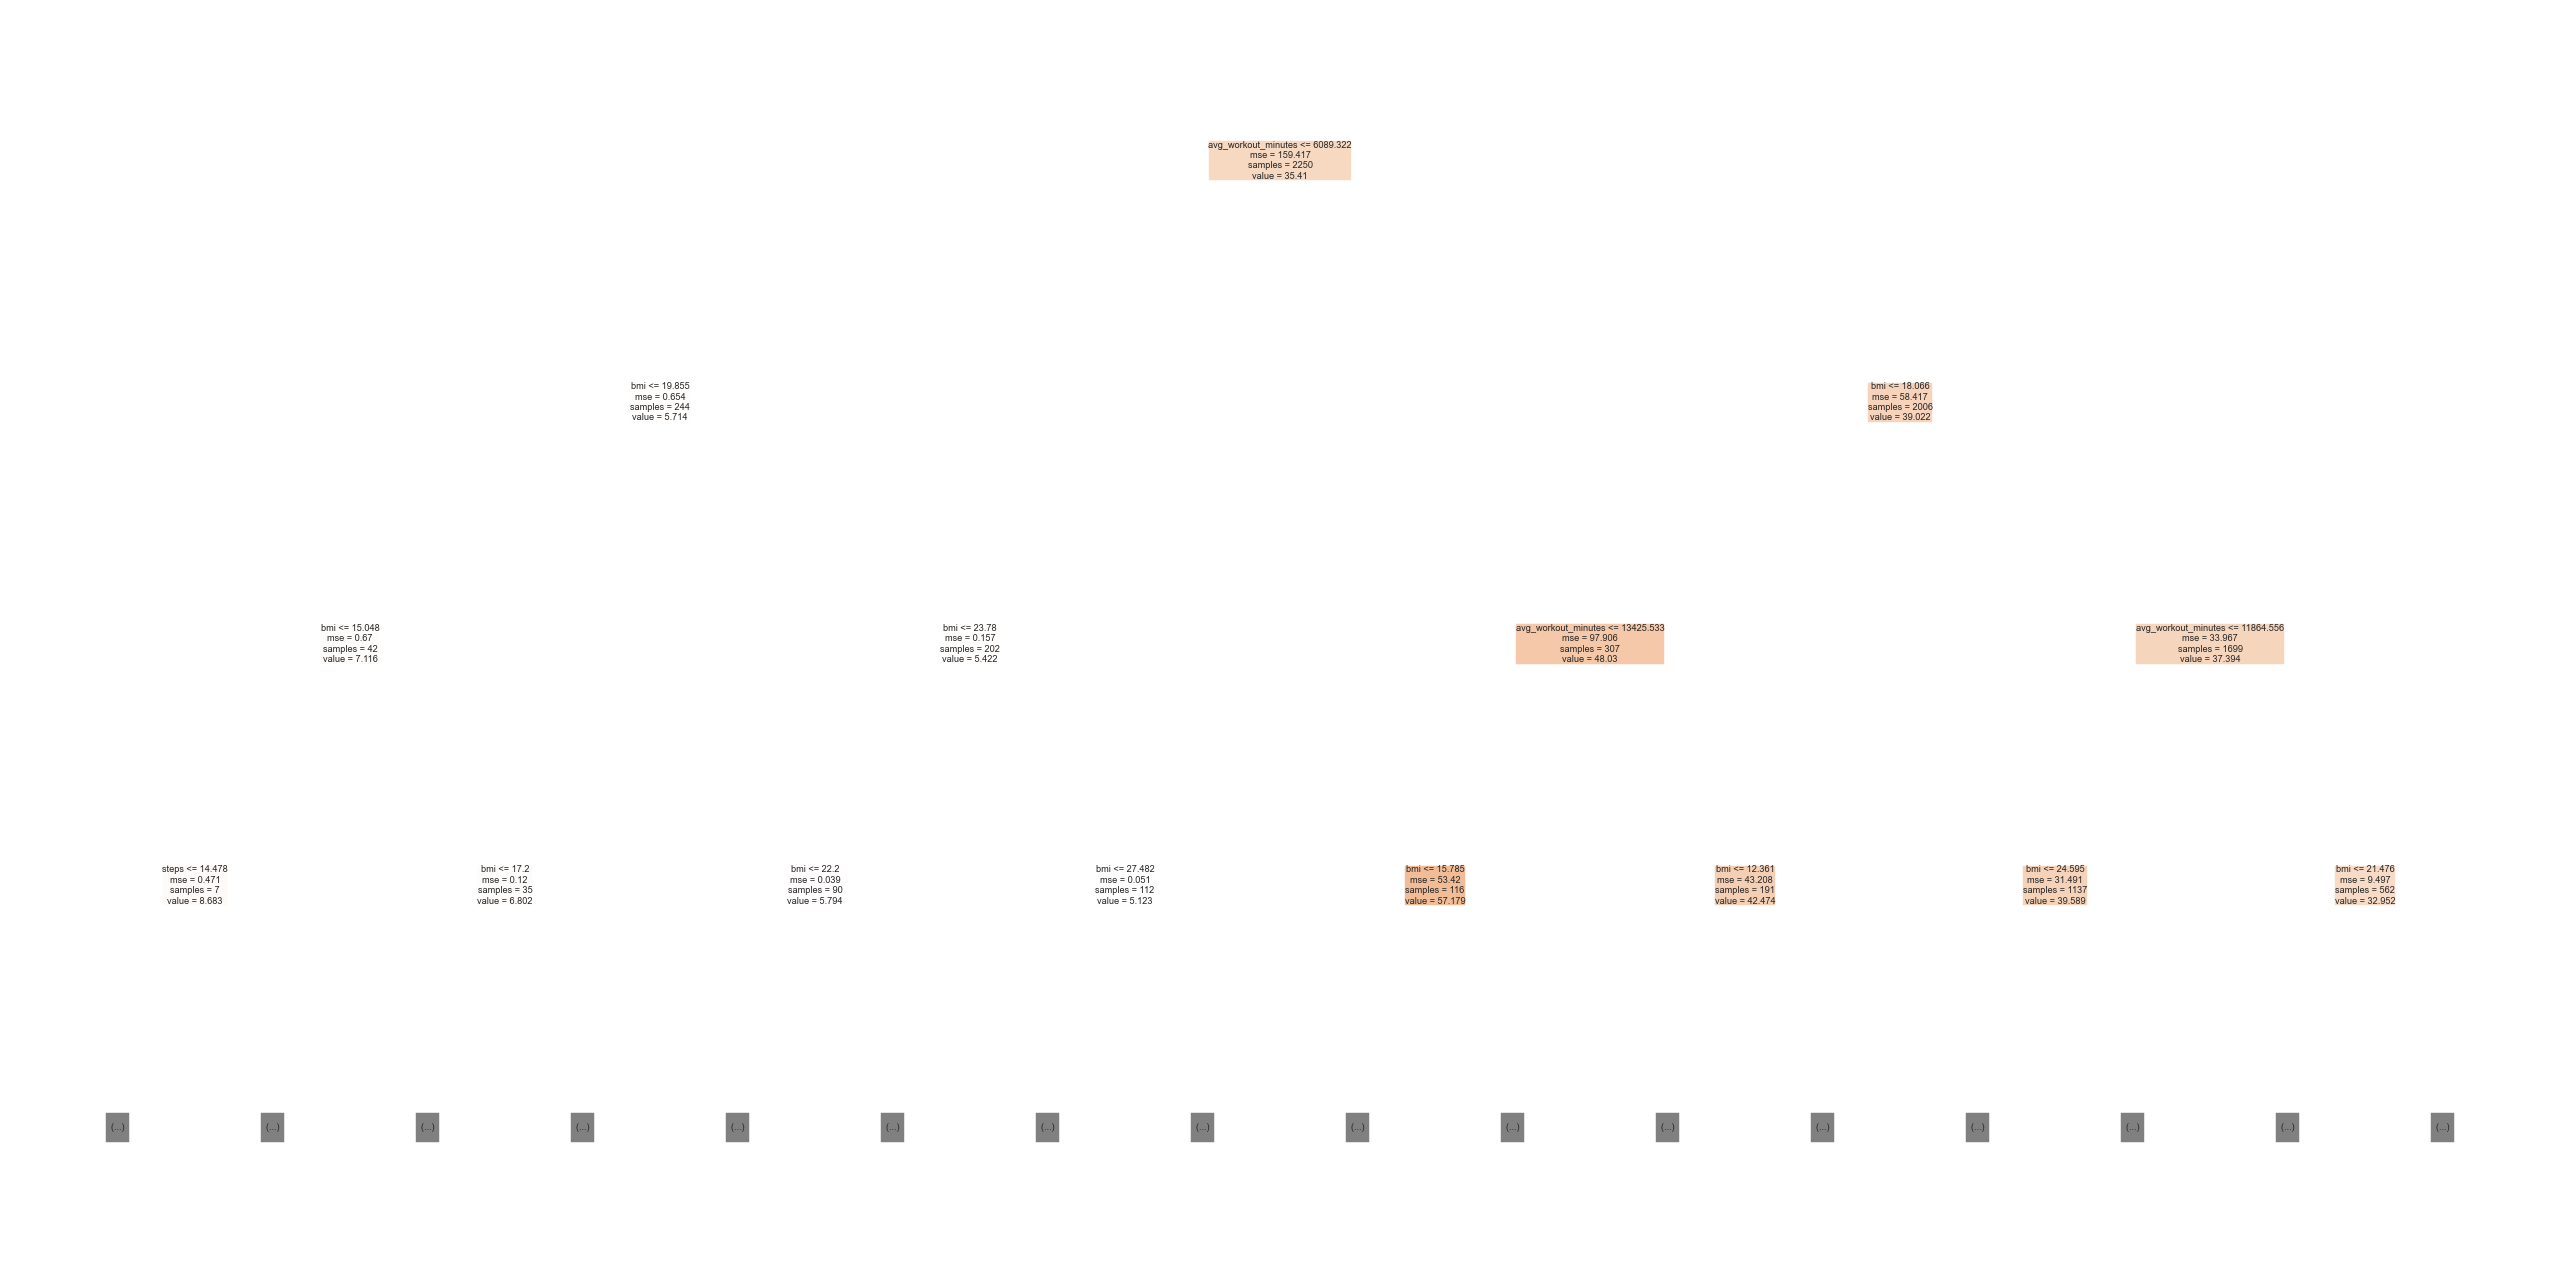

In [73]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (8, 4), dpi=400)


sklearn.tree.plot_tree(dt, max_depth=3, 
                       feature_names = ['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'steps', 'avg_workout_minutes'],
                       filled=True )

plt.show()